# Introduction to feed-forward neural networks

---

Lecture: "Physics-augmented machine learning" @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dr.-Ing. Maximilian Kannapin, Jasper O. Schommartz, Dominik K. Klein

Summer term 2024

---


### In this notebook, you will...


*   Calibrate feed-forward neural networks to different one-dimensional datasets
*   Learn the influence of hyperparameters on the calibrated model
* Learn the difference between interpolation and extrapolation
*   Learn to construct convex and monotonous neural networks






*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

In [1]:
!git clone https://github.com/CPShub/LecturePhysicsAwareML.git

Cloning into 'LecturePhysicsAwareML'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15 (delta 1), reused 12 (delta 1), pack-reused 0
Receiving objects: 100% (15/15), 68.25 KiB | 4.01 MiB/s, done.
Resolving deltas: 100% (1/1), done.


*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook.*


*If you want to clone the repository again, you have to delete it from your Google Colab files first. For this, you can run the following cell.*

In [4]:
%rm -rf LecturePhysicsAwareML

In [ ]:
import tensorflow as tf
import datetime
now = datetime.datetime.now
import LecturePhysicsAwareML.FFNN_introduction.data as ld
import LecturePhysicsAwareML.FFNN_introduction.models as lm
import LecturePhysicsAwareML.FFNN_introduction.plots as lp

## Task 1: Nonlinear regression


''In a nutshell, feed-forward neural networks (FFNNs) can be seen as a composition of several vector-valued functions, where the components of the vectors are referred to as nodes or neurons, and the function in each neuron is referred to as activation function. More explicitely, the FFNN with the vector-valued inpout $\boldsymbol{x}=:\boldsymbol{A}_0\in\mathbb{R}^{n^{[0]}}$, output $\boldsymbol{y}=:\boldsymbol{A}_{[H+1]}\in\mathbb{R}^{n^{[H+1]}}$, and $H$ hidden layers is given by


\begin{equation}
\boldsymbol{A}_h=\sigma^{[h]}\left(\boldsymbol{w}^T\boldsymbol{x}+\boldsymbol{b}\right)\in\mathbb{R}^{n^{[h]}}\,,\qquad h=1,...,H+1\,.
\end{equation}


Here, $\boldsymbol{w}^{[h]}\in\mathbb{R}^{n^{[h]}\times n^{[h-1]}}$ are the weights and $\boldsymbol{b}\in\mathbb{R}^{n^{[h]}}$ the bias in each layer. Together, they form the set of parameters $\boldsymbol{\phi}$ of the neural network, which is optimized in the calibration process to fit a given dataset. In the layers $\boldsymbol{A}_h$, the scalar activation functions $\sigma^{[h]}$ are applied in a component-wise manner.'' (Klein et al., CMAME 400:115501) A FFNN has different hyperparameters. Here, the hyperparameters are given by the number of nodes and layers and the activation functions.

<br>

After fixing the FFNNs hyperparameters, it can be calibrated to fit a given dataset. In this notebook, we consider datasets of the form

\begin{equation}
\mathcal{D}=\big\{(x_i,\,y_i) \big\}_{i=1,...,D}\,,\qquad x_i\in\mathbb{R},\,y_i\in\mathbb{R}\,.
\end{equation}


Consequently, input and output of the FFNNs are also scalar-valued, i.e., $\mathbb{R}^{n^{[0]}}=\mathbb{R}^{n^{[H+1]}}=1$. The parameters $\boldsymbol{\phi}$ of the FFNN are determined such that it best-approximates the data $\mathcal{D}$. Typically, this is done by minimizing a loss (or cost) function which provides a measure for the difference between data and FFNN model prediction. Here, the mean-squared error (MSE) is applied:


\begin{equation}
\operatorname{MSE}(\boldsymbol{\phi},\,\mathcal{D})=\frac{1}{D}\sum_{d=1}^D\lvert\lvert \operatorname{FFNN}(x_i,\,\boldsymbol{\phi})-y_i\rvert\rvert_2^2
\end{equation}


Since this is a highly nonlinear minimisation problem, iterative solution methods are applied. The number of iterations (or epochs) in the optimization process influences the quality of the calibrated model.

<br>

### Tasks

Despite their simple structure, FFNNs can represent basically every continuous function. Here, this is demonstrated by calibrating different FFNNs to different datasets. Furthermore, the influence of model and calibration hyperparameters are investigated.


*  Calibrate FFNNs to different datasets ('bathtub', 'curve', 'double_curve')
* Vary the number of hidden layers in [1, 2, 3] and the number of nodes in [4, 8, 16].
* Vary the number of epochs in the parameter optimization process in [500, 1000, 2500, 3000].
* Use different activation functions, e.g., Relu, Softplus and Sigmoid. Use a linear activation function in the output layer.

Note that you do not have to evaluate all possible combinations, but only enough to understand the influence of the different hyperparameters.



2024-04-18 08:14:58.951178
it took 0:00:42.143358 (sec) to calibrate the model
16/16 [==============================] - 0s 2ms/step


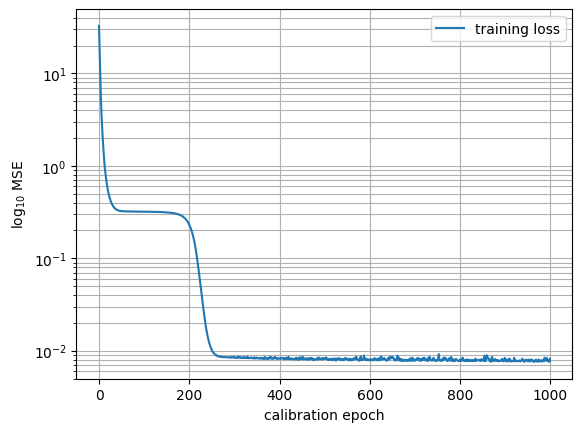

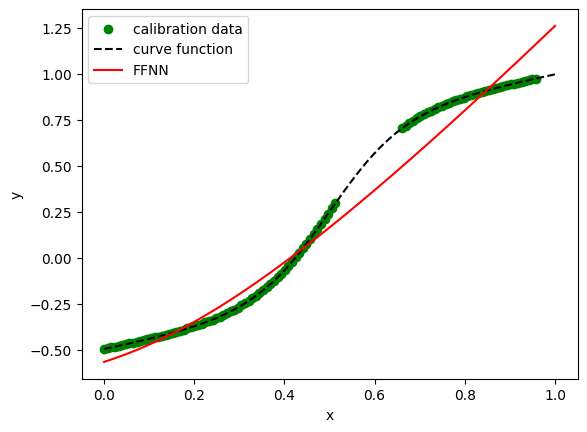

In [ ]:
#   number of nodes in each layer
units = [32,32,1]

#   activation function in each layer
#   options: 'softplus', 'tanh', 'relu', 'linear', ...
activation = ['softplus','softplus','linear']

#   non_neg: restrict the weights in different layers to be non-negative
non_neg = [False, False, False]

#   dataset options: 'bathtub', 'curve', 'double_curve'
data = 'curve'

#   epochs: number of iterations in the optimisation process
epochs = 1000

 #   load model
 #  adapt this so that the students don't see the "non_neg" part at the first task.

model = lm.main(units=units, activation=activation, non_neg=non_neg)

#   load data

xs, ys, xs_c, ys_c = ld.get_data(data)


#   calibrate model

t1 = now()
print(t1)


#   set "verbose=2" to observe the progress of the calibration process
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.002)
h = model.fit([xs_c], [ys_c], epochs = epochs,  verbose = 0)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

lp.plot_loss(h)


# include the type of FFNN used. and show it in the plot title.
model_name = 'FFNN'
lp.plot_data_model(xs, ys, xs_c, ys_c, model, model_name, data, 4)

## Task 2: Convex and monotonous neural networks

''To lay the foundational intuition for constructing convex and monotonus neural networks, we first consider the univariate function


\begin{equation}
f:\mathbb{R}\rightarrow\mathbb{R},\quad x\mapsto f(x):=(g\circ h)(x)=g(h(x))\,,
\end{equation}


where $f$ is composed of two functions $g,h:\mathbb{R}\rightarrow \mathbb{R}$. Given that all of these functions are twice continuously differentiable, convexity of $f$ in $x$ is equivalent to the nonnegativity of the second derivative


\begin{equation}
f''(x)=(g''\circ h)(x)\, h'(x)^2 + (g' \circ h)(x)\, h''(x) \geq 0\,.
\end{equation}


A sufficient, albeit not necessary condition for this is that the function $h$ is convex ($h''\geq 0$), while the function $g$ is convex and nondecreasing (g'\geq 0,\,g''\geq 0$). ... '' (Klein et al., DCE 4:e25)


1D example for convexity and monotonicity. Write the conditions for convex and monotonous FFNNs down.

<br>

Sufficient conditions for convex neural networks are


*   A convex activation function in the first hidden layer
*   Convex and non-decreasing activation functions in every subsequent layer
* Non-negative weights in every layer beside the first one


Sufficient conditions for monotonous neural networks are

*  Monotonous activation functions in every layer
* Non-negative weights in every layer
* If at least one layer uses non-convex activation functions, the overall NN is not convex


<br>

### Tasks

* Construct convex FFNNs (C-FFNNs) and monotonous FFNNs (M-FFNNs) by using suitable activation functions and restrictions to the weights of the FFNN.
* Calibrate C-FFNNs and M-FFNNs to the datasets introduced above. What do you observe?
* For this, consider the following activation functions:

\begin{equation}
\begin{aligned}
\text{Softplus}:\qquad \sigma(x)&=\log(1+e^x)
\\
\text{Tanh}:\qquad \sigma(x)&=\operatorname{tanh}(x)=\frac{e^{2x}-1}{e^{2x}+1}
\\
\text{Linear}:\qquad \sigma(x)&=x
\end{aligned}
\end{equation}

* Which of these functions are convex and / or non-decreasing?

In [ ]:
#   units: number of nodes in each hidden layer
units = [32,32,1]

#   acts: activation function in each hidden layer
activation = ['softplus','softplus','linear']

#   non_neg: restrict the weights in different layers to be non-negative
non_neg = [False, False, False]

#   data: 'bathtub', 'curve', 'double_curve
data = 'curve'

#   epochs: number of iterations in the optimisation process
epochs = 100

 #   load model

model = lm.main(units=units, activation=activation, non_neg=non_neg)

#   load data

xs, ys, xs_c, ys_c = ld.get_data(data)


#   calibrate model

t1 = now()
print(t1)

tf.keras.backend.set_value(model.optimizer.learning_rate, 0.002)
h = model.fit([xs_c], [ys_c], epochs = epochs,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

lp.plot_loss(h)

lp.plot_data_model(xs, ys, xs_c, ys_c, model, data, 4)

## Task 3: Sobolev training
